In [1]:
import torch
from repop import dataset,params2theta,theta2params
import pandas as pd
from matplotlib import pyplot as plt
from synth_data import cases

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=300):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

def rel_error(data,case):
    mus,sigs,rhos = data.ev
    rel_error = torch.abs(mus.cpu().reshape(-1,1)/case.mus-1)
    return torch.sum(rel_error.min(axis=1)[0]*rhos.cpu())

In [3]:
case = cases.case2
datapoints = 1000

case = cases.case3
datapoints = 400

In [4]:
filename = 'synth_data/synth_'+ case.name+ '.csv'
th_gt = params2theta(torch.tensor(case.mus),
                     torch.tensor(case.sigs),
                     torch.tensor(case.rhos))

In [5]:
data = load_dataset(filename,Nmax=datapoints,cutoff=case.cutoff)

In [6]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()


tensor(-2287.6052, device='cuda:0', dtype=torch.float64)

In [7]:
data.evaluate()

6.361171498356066 -2281.2190678732077 -262.48680352183965
6.1524792850028565 -2276.03269793312 -184.78438268906064
6.107382064970336 -2278.0498780114817 -164.8662613200209
6.09712878678269 -2278.1637628903545 -160.67675636907785


(tensor([ 6345.7944, 59370.9572,  6278.2265,  5630.0743, 58662.5540, 57357.6571,
         56626.1421, 30167.6829, 30226.7505,  4404.5701, 66984.9469, 30935.3939,
         34127.0280, 30570.8357, 30301.7893, 28536.5767,  4749.3518],
        device='cuda:0', dtype=torch.float64),
 tensor([ 1057.1650,  3898.3237,  1089.9905,   821.2614,  7193.9765, 10221.8412,
         10642.3797,  2475.1237,  2963.1262,  1100.4441, 19778.2704,  4370.0509,
          6942.7610,  5254.3171,  6053.3150,  6694.4270,  2164.7994],
        device='cuda:0', dtype=torch.float64),
 tensor([0.1572, 0.1567, 0.1219, 0.1062, 0.0935, 0.0733, 0.0633, 0.0539, 0.0415,
         0.0353, 0.0266, 0.0245, 0.0153, 0.0122, 0.0086, 0.0055, 0.0048],
        device='cuda:0', dtype=torch.float64))

/home/pessoa/Codes/CElegans-Plate/dataset_class.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()*bins[-1]).astype(int))


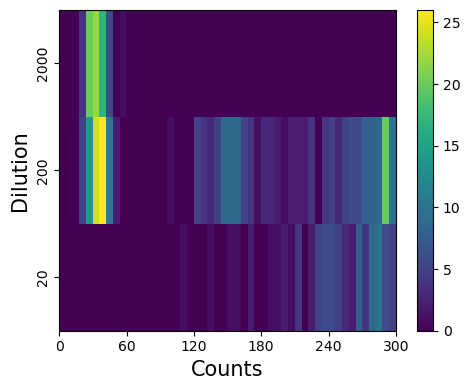

In [8]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.dill_imshow(ax,fig)
plt.tight_layout()
plt.savefig('graphs/synth/fig3a.png',dpi=500)

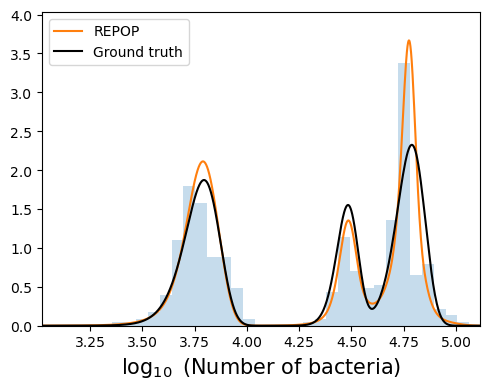

In [9]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3b',dpi=500)

In [10]:
del data.lpkdil_n
#del data
print('Relative error', rel_error(data,case))

Relative error tensor(0.0493, dtype=torch.float64)


In [11]:
data_nocutoff = load_dataset(filename,Nmax=datapoints,cutoff=-1)
data_nocutoff.evaluate(tol=1e-5)

6.062655934020304 -2158.932028587547 -265.1266703649733
5.847444084973855 -2147.94617812089 -190.8664456842357
5.8101897814476695 -2149.166046018325 -174.8813326647551
5.801215356712309 -2149.5442826229832 -170.9282295816701
5.795378524695466 -2149.306824104099 -168.8323286506513


(tensor([ 5614.1697, 56513.3665,  4870.7607, 56105.8835,  7969.0592, 50229.0720,
         30156.9208, 30098.0168, 45969.1780, 75913.0268, 36399.1780, 30622.2964,
         31201.1372,  3101.1767, 31199.6531, 30416.6045], device='cuda:0',
        dtype=torch.float64),
 tensor([  254.7923,  1820.3512,   573.6910,  2327.5292,   470.0255,  6123.9638,
          2320.7182,  2864.6182,  8956.4017, 17144.8574,  7583.0859,  4776.6914,
          5770.8338,   596.2630,  6474.0952,  7141.5335], device='cuda:0',
        dtype=torch.float64),
 tensor([0.1978, 0.1571, 0.1268, 0.1235, 0.0832, 0.0602, 0.0601, 0.0397, 0.0389,
         0.0323, 0.0202, 0.0176, 0.0133, 0.0122, 0.0100, 0.0071],
        device='cuda:0', dtype=torch.float64))

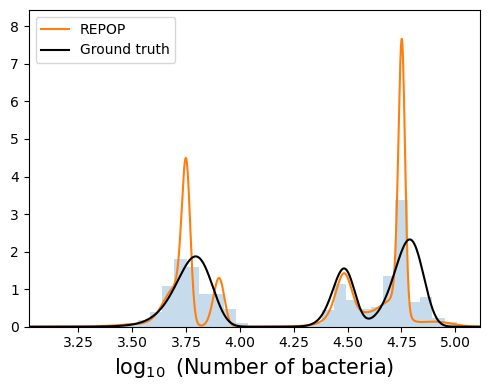

In [12]:
fig,ax = plt.subplots(1,figsize=(5,4))
data_nocutoff.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3c',dpi=500)

In [13]:
print('Relative error', rel_error(data_nocutoff,case))

Relative error tensor(0.1205, dtype=torch.float64)


/home/pessoa/Codes/CElegans-Plate/dataset_class.py:255: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()*bins[-1]).astype(int))


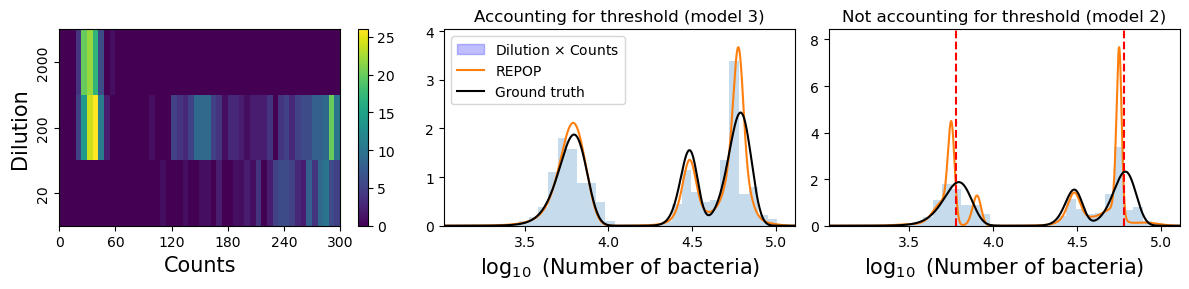

In [14]:
fig,ax = plt.subplots(1,3,figsize=(12,3))
data.dill_imshow(ax[0],fig)
data.log_plots(ax[1],th_gt)
data_nocutoff.log_plots(ax[2],th_gt,legend=False)


ax[1].set_title('Accounting for threshold (model 3)',fontsize=12)
ax[2].set_title('Not accounting for threshold (model 2)',fontsize=12)

#legend=False
for ct in np.log10(data.cutoff*torch.unique(data.dils).numpy()):
    ax[2].axvline(ct,color='red',linestyle='dashed')

plt.tight_layout()
fig.savefig('graphs/synth/'+case.name,dpi=900)